<a href="https://colab.research.google.com/github/CarlosJozala/Previsao_de_VendasFrexco/blob/main/Desafio_Frexco_CarlosJozala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Previsão de Vendas - Python (Desafio Frexco)

Text(0.5, 1.0, 'Previsão de Vendas para os Próximos 5 dias')

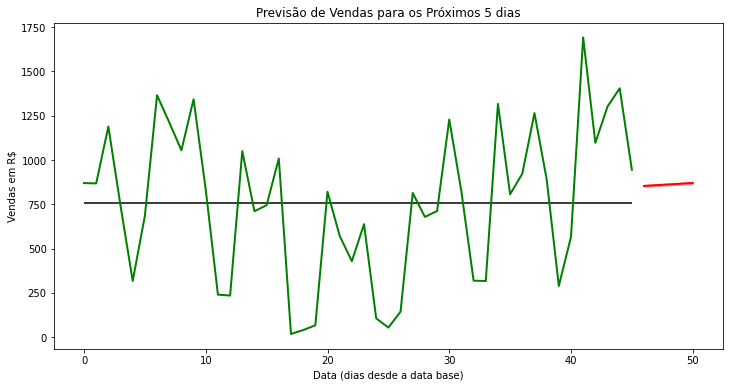

In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carrega o arquivo xlsx com os dados
df = pd.read_excel('Dados.xlsx', index_col='Data')

# Converte a coluna Data em números inteiros (número de dias desde uma data base)
df.index = (df.index - df.index[0]).days

# Cria o modelo de regressão linear
reg = LinearRegression()
reg.fit(df.index.values.reshape(-1, 1), df['Vendas'].values.reshape(-1, 1))

# Calcula o dia final da série de dados
last_day = df.index[-1]

# Faz a previsão para os próximos 5 dias
future_dates = [last_day + x for x in range(1,6)]
future_pred = reg.predict(np.array(future_dates).reshape(-1,1))

# Plota o gráfico de previsão
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Vendas'], label='Dados históricos', color='green', linewidth=2)
plt.plot(future_dates, future_pred, label='Previsão para os próximos 5 dias', color='red', linewidth=2)
plt.fill_between(future_dates, future_pred.reshape(-1) - np.std(future_pred), future_pred.reshape(-1) + np.std(future_pred), color='Red', alpha=0.3)
plt.hlines(np.mean(df['Vendas']), xmin=df.index.min(), xmax=df.index.max(), label='Média dos dados históricos')
plt.xlabel('Data (dias desde a data base)')
plt.ylabel('Vendas em R$')
plt.title('Previsão de Vendas para os Próximos 5 dias')
